In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [31]:
df = pd.read_csv('dataset3.0.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns = ['video_id'])
df = df.drop(columns = ['daily_view_classification'])
df = df.drop(columns = ['daily_likes_normal'])
df = df.drop(columns = ['daily_dislikes_normal'])
df = df.drop(columns = ['daily_comment_count_normal'])
df = df.drop(columns = ['category_of_title_length'])
df = df.drop(columns = ['tags_length_category'])
df = df.drop(columns = ['stop_words_count_title_normal'])
df = df.drop(columns = ['sub_date'])

y = df.daily_views.values
y = np.log(y+1)
X = df.drop(columns = ['daily_views'])
X = X.values

In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=9)

In [16]:
#offset = int(X.shape[0] * 0.9)
#X = X.astype(np.float32)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

clf = RandomForestRegressor(n_estimators = 700,random_state = 10)
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    print(clf.score(X_test,y_test))

TRAIN: [ 4095  4096  4097 ... 40946 40947 40948] TEST: [   0    1    2 ... 4092 4093 4094]
0.030351811544267582
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [4095 4096 4097 ... 8187 8188 8189]
0.10174819646049305
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [ 8190  8191  8192 ... 12282 12283 12284]
0.010705496358931699
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [12285 12286 12287 ... 16377 16378 16379]
0.04947678940268885
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [16380 16381 16382 ... 20472 20473 20474]
0.1039571704653176
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [20475 20476 20477 ... 24567 24568 24569]
0.508758108866567
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [24570 24571 24572 ... 28662 28663 28664]
0.6263756170877157
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [28665 28666 28667 ... 32757 32758 32759]
0.5644517555820628
TRAIN: [    0     1     2 ... 40946 40947 40948] TEST: [32760 32761 32762 ... 3

In [32]:
from sklearn.model_selection import cross_validate
clf = RandomForestRegressor(n_estimators = 700,max_depth = 5, random_state = 10)
cv_results = cross_validate(clf, X, y, cv=10,scoring='r2',return_train_score=False)
cv_results['test_score']

array([ 0.26732765,  0.21491883,  0.14769813,  0.23603492,  0.12136726,
        0.14946201,  0.02105371,  0.06090871, -0.03573908, -0.24117654])

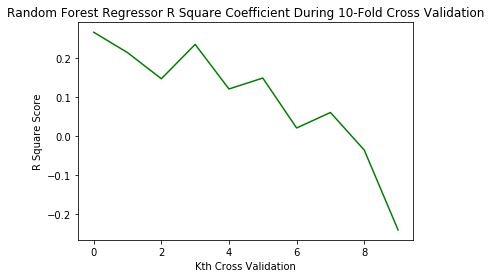

In [36]:
fig = plt.figure()
plt.plot(cv_results['test_score'], color = 'green')
plt.xlabel('Kth Cross Validation')
plt.ylabel('R Square Score')
plt.title('Random Forest Regressor R Square Coefficient During 10-Fold Cross Validation')
plt.show()
fig.savefig('Random_Forest_R^2.png',bbox_inches='tight')

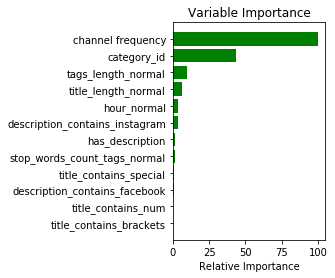

In [34]:
# Plot feature importance
clf.fit(X, y)
X = df.drop(columns = ['daily_views'])
y = df.daily_views
fig = plt.figure()
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center',color = 'green')

plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
fig.savefig('Random_Forest.png',bbox_inches='tight')

In [37]:
clf.score(X,y)

-0.15008470968866838